In [1]:
import pandas as pd
import numpy as np

In [80]:
df=pd.read_csv('data/gemstone.csv')

In [81]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [82]:
# id column is uniqe and it will no any affect on target features
# so, we will drop id features
df = df.drop(labels=['id'], axis=1)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 14.8+ MB


In [84]:
### Dtype of all the features are in required format
## We can convert object dtype into str for memory efficiency, but we will not do here

In [85]:
# Checking Missing Values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [86]:
#There is no any missing value

In [87]:
#Checking duplicates in dataset
df.duplicated().sum()

0

In [88]:
# There is not any duplicate value
#df.drop_duplicates()

In [89]:
### Segrigate Numerical and categorical columns

numerical_features = df.columns[df.dtypes != 'object']
categorical_features = df.columns[df.dtypes == 'O']

# both we can write "object" or "O" (capital o)

print('Numerical Features:', numerical_features)
print('Categorical Features:', categorical_features)

Numerical Features: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Features: Index(['cut', 'color', 'clarity'], dtype='object')


In [90]:
df[categorical_features].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [91]:
df['cut'].value_counts()

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64

In [92]:
df['color'].value_counts()

G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64

In [93]:
df['clarity'].value_counts()

SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64

In [94]:
### Visualization of Categorical and numerical features

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

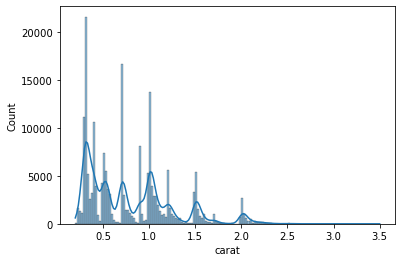

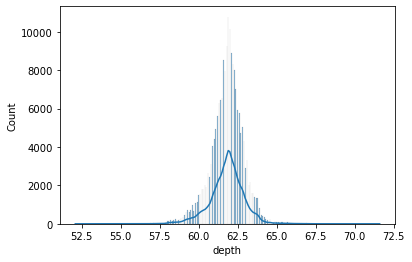

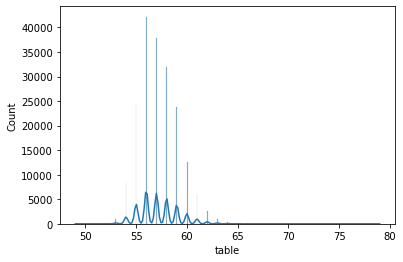

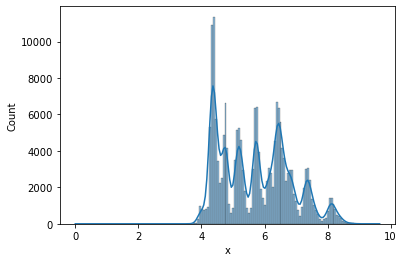

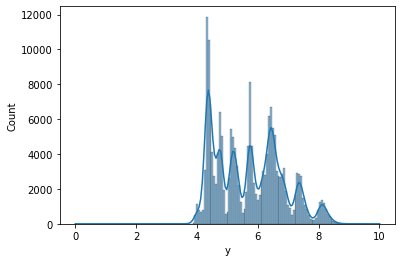

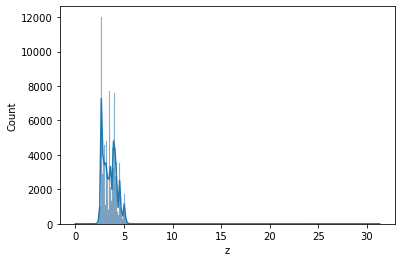

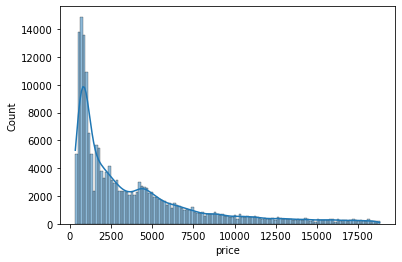

In [96]:
# Numerical features visualization

for fea in numerical_features:
    sns.histplot(data=df[fea], kde=True)
    #we can also write as below line
    #sns.histplot(data=df, x=fea, kde=True)
    print('\n')
    plt.show()


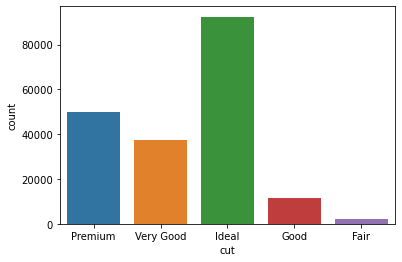

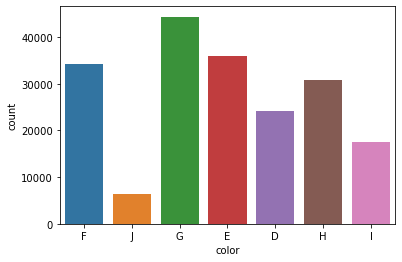

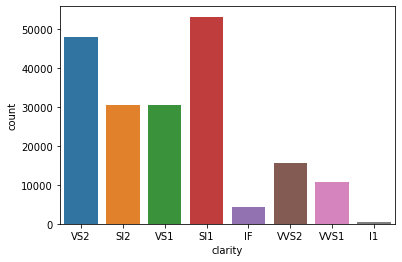

In [97]:
# Count plot for categorical features
for fea in categorical_features:
    sns.countplot(x=fea, data=df)
    plt.show()

<AxesSubplot:>

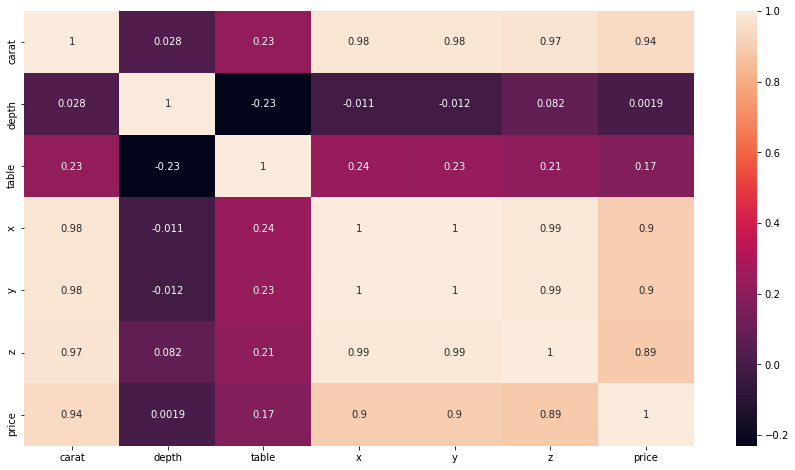

In [98]:
### Cheking the correlation between the variables
plt.figure(figsize=(15,8))
sns.heatmap(df[numerical_features].corr(), annot=True)

In [99]:
### Observation
### there is highly (greater then 95%) correlation between carat, x, y, z features
### so we can drop 3 out of 4 features (carat, x, y, z)
### but here we will not drop any features, because we will have to see overfitting
### if we will drop the highly correlated features then we will not able to see overfitting

In [100]:
##Currently we will not execute this
## df.drop(labels=['x','y','z'],axis=1)

In [101]:
### Feature Engineering for categorical features
## encoding the categorical features

In [102]:
df[categorical_features].head()

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2


In [103]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [104]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [105]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [106]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [107]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [108]:
clarity_map = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4,  'VS1':5, 'VVS2':6, 'VVS1':7,  'IF':8}

In [109]:
df['cut'] = df['cut'].map(cut_map)
df['color'] = df['color'].map(color_map)
df['clarity'] = df['clarity'].map(clarity_map)

In [110]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
